# Tutorial 2: Continuity and differential calculus

**Topics:**
* solve equations, use continuity
* optimisation and solver: <code>gekko</code>
* calculate derivatives, <code> numdifftools </code> 

### 1. Working with GEKKO

GEKKO is a Python package for machine learning and optimization of mixed-integer and differential algebraic equations. It is coupled with large-scale solvers for linear, quadratic, nonlinear, and mixed integer programming (LP, QP, NLP, MILP, MINLP). We will discover some of its static features in this course. Here we will look at GEKKO as a solver of nonlinear equations. 




#### 1.1. Installing GEKKO

The GEKKO package is available through the package manager <code>pip</code> in Python.
To install use:

 <code> pip install gekko </code>
 
using Terminal. There is also an alternative way. Another method to obtain GEKKO is to include a code snippet at the beginning of a Python script. If GEKKO is not available, it uses the pip module to install it. 

If a <code> pip </code> install does not work - try the following.

In [55]:
try:
    from pip import main as pipmain
except:
    from pip._internal import main as pipmain
pipmain(['install','gekko'])
# to upgrade: pipmain(['install','--upgrade','gekko'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

#### 1.2 GEKKO and solving linear and nonlinear equations


In this tutorial we will learn how to use GEKKO to solve nonlinear equations. An introduction is given here:
   * youtube clip:  https://youtu.be/CzWdejCDOAg
   * written documentation: https://gekko.readthedocs.io/en/latest/quick_start.html

The basics are easy to follow. See the following example.

##### **Example 1:** solving a nonlinear equations
Consider the following system of equations:

$\left\{\begin{array}{rcl}
x+\alpha y &=& 0\\
x^2+y^2 & =& 1
\end{array}\right.$

Here $\alpha$ is a given scalar. It is not hard to solve for $x$ and $y$ for any value of $\alpha$ analytically, on paper. 

* Find those solutions $(x(\alpha),y(\alpha))$

Now we will check these solutions with use of GEKKO.
In GEKKO you will need to carry out the following steps:

* Create an instance of GEKKO by calling <code>m=GEKKO()</code>
* Define variables <code>m.Var</code> with initial values
* Define the relevant equations <code>m.Equations</code>
* Call <code>m.solve</code>

How this is done, here is an example.


In [56]:
import numpy as np
from gekko import GEKKO
alpha = 1.
m = GEKKO(remote=False)             # create GEKKO model
x = m.Var(value=-1)     # define new variable, initial value=-1
y = m.Var(value=1)      # define new variable, initial value=1
m.Equations([x == -alpha*y, x**2+y**2==1]) # define equations
m.solve(disp=False)     # solve, display algorithmic information
print([x.value[0],y.value[0]]) # print solution

[-0.70710678119, 0.70710678119]


If you created the GEKKO instance by
<code>m = GEKKO()</code>
you may call a number of standard functions 
<code>m.exp(),m.log, m.sin(),m.cos(),m.sigmoid(), m.tanh()</code>, andsoforth. If you want more information, type <code>help(m)</code>. Here the options and other functionalities are listed. 

##### **Example 2:** solving a nonlinear equations
Below we will try to find a solution to

$\left\{\begin{array}{rcl}
\cos(x+\pi)-\pi \sin(\pi y) &=& 0\\
x+y & =& 0
\end{array}\right.$

In [57]:
import numpy as np
from gekko import GEKKO
alpha = 1.
m = GEKKO(remote=False)             # create GEKKO model
x = m.Var(value=-1)     # define new variable, initial value=-1
y = m.Var(value=1)      # define new variable, initial value=1
m.Equations([m.cos(x+np.pi) == np.pi*m.sin(np.pi*y),x+y==0]) # define equations
m.solve(disp=False)     # solve, display algorithmic information
print([x.value[0],y.value[0]]) # print solution


[-1.0505763609, 1.0505763609]


In [58]:
## For help on GEKKO
help(m)

Help on GEKKO in module gekko.gekko object:

class GEKKO(builtins.object)
 |  GEKKO(remote=True, server='http://byu.apmonitor.com', name=None)
 |  
 |  Create a model object. This is the basic object for solving optimization problems
 |  
 |  Methods defined here:
 |  
 |  Array(self, f, dim, **args)
 |      #%% Add array functionality to all types
 |  
 |  CV(self, value=None, lb=None, ub=None, integer=False, fixed_initial=True, name=None)
 |      A variable with a setpoint. Reaching the setpoint is added to the
 |      objective.
 |  
 |  Connection(self, var1, var2=None, pos1=None, pos2=None, node1='end', node2='end')
 |      Connect two variables or a variable to a value. When
 |      Variables are connected, they become a single entity and are merged.
 |      The first variable retains all of the properties and the second variable
 |      becomes an alias for the first.
 |      
 |      var1 = Variable 1 name
 |      var2 = Variable 2 name (default=None)
 |      pos1 = Step positi

### Exercise: 

Consider the function $f_\alpha:\mathbb{R}^3\rightarrow \mathbb{R}$ as is given by

$$f_\alpha(x,y,z)=xyz^2+x^2+x+y^3+\alpha z.
$$
where $\alpha$ is a given constant.


#### part a
It is clear that $f_\alpha(0,0,0)=0$ for all $\alpha$. 
Use <code>GEKKO</code> to find a solution to $f_\alpha(x,y,z)=0$ and where $x=0.5$. 


In [59]:
from gekko import GEKKO

# YOUR CODE HERE
alpha=0.2
x=0.5
m=GEKKO(remote=False)
y=m.Var(-1)
z=m.Var(-1)
m.Equation(x*y*z**2+x**2+x+y**3+alpha*z==0)
m.solve(disp=False)
print(y.value,z.value)

[-0.68342574173] [-0.86766858165]


In [60]:
# use the answer to get to the answer...
x=0.5
y=-0.71262967302
z=-0.80007259102
(x*y*z**2+x**2+x+y**3)/(-z)


0.19999999764211288

If your answer is

[-0.71262967302, -0.80007259102]

then you're fine! By the way, is this solution unique? 

#### part b
* Determine the gradient $\nabla f_\alpha(x,y,z)$ by hand. 
* Determine a zero of $\nabla f_1$.
* Use <code>gekko</code> to solve $\nabla f_\alpha(x,y,z)=0$ for $(x,y,z)$ for 20 regular paced values in the interval $[0,1]$. In order to do so, first create a function <code>solve_zero_gradient</code> that calculates a zero for a given $\alpha$. Then gather the information. 

In [61]:
# Calculate a zero of gradient f_1
from gekko import GEKKO
alpha = 1
m = GEKKO(remote=False)  
# YOUR CODE HERE 
x=m.Var(1)
y=m.Var(1)
z=m.Var(1)
m.Equations([2*x + y*z**2 + 1 == 0, x*z**2 + 3*y**2 == 0, alpha+(2*x*y*z) == 0])
m.solve(disp=False)
print([x.value[0],y.value[0],z.value[0]]) # print solution

[-0.82545540776, 0.56367825878, 1.0745957111]


In [62]:
# Define function that returns a solution (if at all) for a given value of alpha
def solve_zero_gradient(alpha):
    '''For given alpha solve for (x,y,z) with grad f(x,y,z)=0'''
    # input: scalar alpha
    # output:  x, y, z value
    
    
    # YOUR CODE HERE
    m=GEKKO(remote=False)
    x=m.Var(1)
    y=m.Var(1)
    z=m.Var(1)
    m.Equations([y*z**2+2*x+1==0,x*(z**2)+3*(y**2)==0,2*x*y*z+alpha==0])
    m.solve(disp=False)
    return x.value[0],y.value[0],z.value[0]


In [63]:
# Calculate for m values of alpha in [0.,1.] corresponding solutions for the variables x,y,z such that grad f_alpha(x,y,z)=0
# This will specify an mx3 array of solutions solutions[]
# for the solutions found, plot the x coordinates versus the y coordinates

import matplotlib.pyplot as plt


m=20
alpha = np.linspace(0.,1.,m)
m= len(alpha)
solutions = np.zeros((m,3))
# YOUR CODE HERE
for i in range(20):
    solutions[i,:]=solve_zero_gradient(alpha[i]) 

solutions
    

array([[-5.00000000e-01,  1.27221778e-04,  9.80604160e-04],
       [-5.09153550e-01,  1.45920294e-01,  3.54202758e-01],
       [-5.24573071e-01,  2.04828973e-01,  4.89834104e-01],
       [-5.42557551e-01,  2.48758003e-01,  5.84944663e-01],
       [-5.61669859e-01,  2.84765652e-01,  6.58123914e-01],
       [-5.81185592e-01,  3.15670632e-01,  7.17195223e-01],
       [-6.00721779e-01,  3.42953444e-01,  7.66406373e-01],
       [-6.20073348e-01,  3.67507445e-01,  8.08360785e-01],
       [-6.39131859e-01,  3.89919778e-01,  8.44774234e-01],
       [-6.57841996e-01,  4.10599578e-01,  8.76835707e-01],
       [-6.76182545e-01,  4.29845041e-01,  9.05400090e-01],
       [-6.94144967e-01,  4.47880016e-01,  9.31101925e-01],
       [-7.11734061e-01,  4.64878084e-01,  9.54422844e-01],
       [-7.28959612e-01,  4.80976324e-01,  9.75736595e-01],
       [-7.45834437e-01,  4.96285170e-01,  9.95338282e-01],
       [-7.62372824e-01,  5.10895015e-01,  1.01346462e+00],
       [-7.78589582e-01,  5.24880858e-01

In [64]:
#Totally not stolen from mikel. Let's call it... collaboration.
correctx = [float(x) for x in "-0.5 -0.50915355 -0.52457305 -0.54255754 -0.56166986 -0.58118559 -0.60072178 -0.62007335 -0.63913186 -0.65784284 -0.67618258 -0.69414497 -0.71173406 -0.72895961 -0.74583438 -0.76237282 -0.77858958 -0.79449946 -0.8101168  -0.82545541".split()]

np.allclose(solutions[:,0], correctx)

True

Check your solutions for the x coordinate. These should agree with the following

$[-0.5        -0.50915355 -0.52457305 -0.54255754 -0.56166986 -0.58118559
 -0.60072178 -0.62007335 -0.63913186 -0.65784284 -0.67618258 -0.69414497
 -0.71173406 -0.72895961 -0.74583438 -0.76237282 -0.77858958 -0.79449946
 -0.8101168  -0.82545541]
$

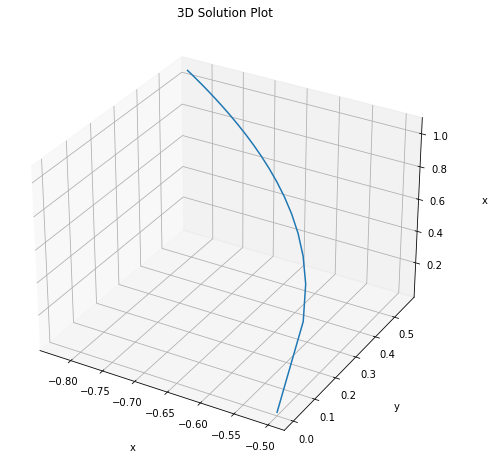

In [65]:
# Plotting your solution 3D
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()

ax.plot3D(solutions[:,0],solutions[:,1],solutions[:,2])
ax.set_title('3D Solution Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('x', labelpad=20)

plt.show()

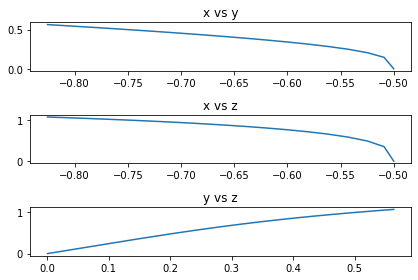

In [66]:

import matplotlib.pyplot as plt
fig, axs = plt.subplots(3,1)
axs[0].plot(solutions[:,0],solutions[:,1])
axs[0].set_title('x vs y')

axs[1].plot(solutions[:,0],solutions[:,2])
axs[1].set_title('x vs z')

axs[2].plot(solutions[:,1],solutions[:,2])
axs[2].set_title('y vs z')
#plt.axis('equal')

fig.tight_layout()
#plt.grid()
plt.show()



### 2. Working with <code> numdifftools </code>

Above it was easy to calculate the derivatives by hand. But in many applications you may need to turn to numerical differentiation. Here you will learn how to use software, in this case <code>numdifftools</code>, to calculate derivatives. Using these numerical tools can make computations in practice a lot easier. However, basic theoretic understanding of what derivatives in different settings mean is still essential!

#### 2.1 Numdifftools package
First you need to make sure you have <code>numdifftools</code> installed. This package contains tools to calculate derivatives of (multivariate) functions, including gradients and Hessian matrices. Check if the package is already available by running the cell below.

In [67]:
pip install numdifftools

Note: you may need to restart the kernel to use updated packages.


In [68]:
import numdifftools as nd
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

If you received an error, you'll most probably still need to install the package. How to do this, and other information about the package can be found here:

* Information for installation: https://numdifftools.readthedocs.io/en/v0.9.39/ 
* Information about the numerical methods used: https://numdifftools.readthedocs.io/en/latest/topics/index.html

If you work with Google's Colab
The computation of derivatives with <code>numpydifftools</code> is very natural. See the example below. The <code>numdifftools</code> package does well on classes of regular functions. Where <code>np.tanh</code> is written there can be any reasonable univariate real valued function $\mathbb{R}\rightarrow \mathbb{R}$.  

Do realize, however, that it is a *numerical* tool, so instances may arise in which you do not get the expected results. 

#### **Example 2.1**
We will apply numerical differentiation to the $\tanh$ function

$$\tanh(x)=\frac{e^x-e^{-x}}{e^{x}+e^{-x}}.
$$

This function plays a very important role in machine learning applications, as *activation function* in neural networks. See how easy it is to generate graphs of the (higher order) derivatives.

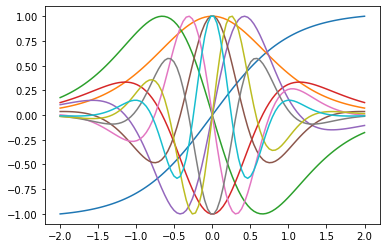

In [69]:
# Calculate the first 10 derivatives for tanh in 100 points in the interval [-2,2], and plot the results:

x = np.linspace(-2, 2, 100)
for i in range(10):
    df = nd.Derivative(np.tanh, n=i)
    
    y = df(x)
    h = plt.plot(x, y/np.abs(y).max())

#### 2.2 Calculating derivatives of multivariate functions

Calculating gradients and Hessian matrices for multivariate functions is natural as well. For example, consider the function $f:\mathbb{R}^2\rightarrow\mathbb{R}$ defined by
$$f(x,y)=x^2+y^3x.
$$
We will calculate $\nabla f (1,1)$ and the Hessian matrix at $(1,1)$, $H_f(1,1)$.


In [70]:
def func1(xy):
    x = xy[0]
    y= xy[1]
    f = x**2+y**3*x
    return f

xy_values = [1,1]
gradf = nd.Gradient(func1)(xy_values)
Hessf = nd.Hessian(func1)(xy_values)

print(f"The gradient at (x,y)=({xy_values[0]} {xy_values[1]}) is given by", gradf)
print(f"The Hessian matrix of f at (x,y)=({xy_values[0]} {xy_values[1]}) is given by", Hessf)

The gradient at (x,y)=(1 1) is given by [3. 3.]
The Hessian matrix of f at (x,y)=(1 1) is given by [[2. 3.]
 [3. 6.]]


In [71]:
nd.Gradient(func1)(xy_values)

array([3., 3.])

#### **Exercise:** The sigmoid function as multivariate function
Define $f:\mathbb{R}^3\rightarrow \mathbb{R}$ by

$$f(x,\beta_1,\beta_2)=\frac{1}{1+e^{-\beta_2(x-\beta_1)}}.
$$

As a function of only the first entrance, you may recognize the so-called *sigmoid function*, which plays a central role in lots of practical applications ranging from logistic regression to neural networks.

* Code the function $f$ and calculate the gradient of $f$ as a function of inputs $(x,\beta_1,\beta_2)$. 
* Use <code>nd.Hessian</code> to calculate $Hf(1,1,1)$
* Calculate the eigenvalues of $Hf(1,1,1)$ using the appropriate numpy code.

In [72]:
## EXERCISE

# define function fsig()
#   input xbetavalues: (3,) array
#   output function value f(xbetavalues)
# define function fsig_grad()
#   input xbetavalues: (3,) array
#   output gradient of f evaluated at (x,beta1,beta2)

# YOUR CODE HERE
val=[1,1,1]
def fsig(val): return 1/(1+np.exp(-val[2]*(val[0]-val[1])))
def fsig_grad(val): return nd.Gradient(fsig)(val)
H=nd.Hessian(fsig)(val)
np.linalg.eigvals(H)


array([-3.53553391e-01,  1.46767008e-17,  3.53553391e-01])

In [73]:
# Calculate the Hessian matrix Hf(1,1,1) and its eigenvalues
# YOUR CODE HERE
H

array([[-4.69401551e-17,  5.07493338e-17,  2.50000000e-01],
       [ 5.07493338e-17, -1.20908320e-18, -2.50000000e-01],
       [ 2.50000000e-01, -2.50000000e-01,  0.00000000e+00]])

Did you get the following answers?

In [74]:

#The Hessian matrix at [1,1,1] is

ans1=np.array([[-4.69401551e-17 , 5.07493338e-17,  2.50000000e-01],
                [ 5.07493338e-17 ,-1.20908320e-18, -2.50000000e-01],
                [ 2.50000000e-01 ,-2.50000000e-01 , 0.00000000e+00]])

#Eigenvalues are given by

ans2=np.array([-1.2090832e-18,1])

In [75]:
np.allclose(H,ans1)


True

#### Exercise: the chain rule
Now look at the function

$$h(x)=\frac{1}{1+e^{-x}}.
$$
look at the composite function ${h}\circ g$ where  
$g:\mathbb{R}^3\times \mathbb{R}\rightarrow \mathbb{R}$ is given by
$$g(a,b)=\tanh(a\cdot y+b)
$$
where $y=\begin{pmatrix} 1\\
2\\
3\end{pmatrix}$.

Use <code>numdifftools</code> to calculate numerically $D (h\circ g)$
* directly by differentiation of the composite function $h\circ g$, and
* indirectly, using the chain rule for differentiation -- and thus expressions for $Dh$ and $Dg$
* Does this function have stationary points?

In [76]:
def hfunc(x):
    return fsig([x,1,1])

# Define function gfunc(abvalues)
# input (4,) array
# output function value

# YOUR CODE HERE
y=[1,2,3]
def gfunc(ab: np.array)-> float : return np.tanh(np.dot(ab[0:3],y)+ab[-1])

def hgfunc(vals): return hfunc(gfunc(vals))

In [77]:
# Define composite function hgfunc
# Calculate the derivative of hgfunc in [.01,.02,.03,.04] as Dhg([.01,.02,.03,.04])
# Calculate the derivative of hgfunc in [1,2,3,4] as Dhg([1,2,3,4])

# YOUR CODE HERE
Dhg= nd.Gradient(hgfunc)
Dhg([0.1,0.2,0.3,0.4])

array([0.02587129, 0.05174258, 0.07761386, 0.02587129])

In [78]:
Dhfunc = nd.Derivative(hfunc)
Dgfunc = nd.Gradient(gfunc)

# Define function chaindiff which calculates the derivative using the chain rule
# YOUR CODE HERE
def chaindiff(vals): return Dhfunc(gfunc(vals))*Dgfunc(vals)

#check your answer!
chaindiff([.01,.02,.03,.04])

array([0.20538716, 0.41077432, 0.61616147, 0.20538716])

#### *Example 2.2:*  Jacobians
Look at the code below, what is it doing?

In [79]:
# What is happening here?
func = lambda x: np.vstack((x[0]*x[1]+np.pi*x[2],np.cos(x[0]**2)+np.exp(x[1]**2)+x[2]**2))
jfunc = nd.Jacobian(func)

numpy_jacobianf = np.array(jfunc([1,1,1]))
numpy_jacobianf1 = numpy_jacobianf[:,:,0]
print(numpy_jacobianf1)


[[ 1.          1.          3.14159265]
 [-1.68294197  5.43656366  2.        ]]


#### **Exercise**
Consider the function

$$ h(x,y,z)=\begin{pmatrix}
xy+z\\
x^2+y^2+\tanh(z^2)
\end{pmatrix}
$$

Create a function <code>hjac</code> that calculates the Jacobian of $h$ at given values $(x,y,z)\in\mathbb{R}^3$.

You may want to try <code>help(nd.Jacobian)</code>.

In [80]:
help(nd.Jacobian)

Help on class Jacobian in module numdifftools.core:

class Jacobian(Derivative)
 |  Jacobian(fun, step=None, method='central', order=2, n=1, **options)
 |  
 |  Calculate Jacobian with finite difference approximation
 |  
 |  Parameters
 |  ----------
 |  fun : function
 |     function of one array fun(x, `*args`, `**kwds`)
 |  step : float, array-like or StepGenerator object, optional
 |      Defines the spacing used in the approximation.
 |      Default is MinStepGenerator(**step_options) if method in in ['complex', 'multicomplex'],
 |      otherwise
 |          MaxStepGenerator(**step_options)
 |      The results are extrapolated if the StepGenerator generate more than 3
 |      steps.
 |  method : {'central', 'complex', 'multicomplex', 'forward', 'backward'}
 |      defines the method used in the approximation
 |  order : int, optional
 |      defines the order of the error term in the Taylor approximation used.
 |      For 'central' and 'complex' methods, it must be an even number

In [81]:
# Create function h
# Create function hjac that returns the Jacobian of h as a matrix
# Check your calculations using hjac([1,2,3])

# YOUR CODE HERE
hfunc= lambda vals: np.vstack((vals[0]*vals[1]+vals[2],vals[0]**2+vals[1]**2+np.tanh(vals[2]**2)))
jac_h= nd.Jacobian(hfunc)

In [82]:
vals=np.array([1,2,3])
jac_h(vals)

array([[[2.00000000e+00],
        [1.00000000e+00],
        [1.00000000e+00]],

       [[2.00000000e+00],
        [4.00000000e+00],
        [3.65519539e-07]]])

Did you get the following answer?

In [87]:
ans=np.array([[2.        , 1.        , 1.        ],
       [2.        , 4.        , 0.00986604]])